# Phase 2 Project 4 Solutuion

#### Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('TIT.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

So we have 891 rows and 12 columns in the dataset

And Survived column is target variable

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

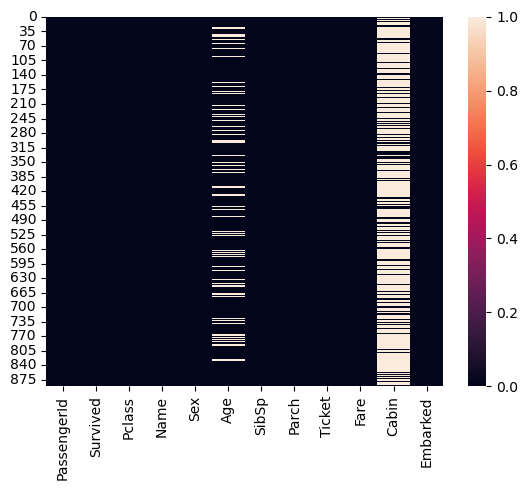

In [7]:
sns.heatmap(df.isnull())

Here we can see we have null vslues in 3 colummns

but in cabin column we have 687 null values out of 891 rows as my observation cabin column is not contributing much to my dataset

In [8]:
df = df.drop(columns = 'Cabin', axis =1)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


so we have removed Cabin column from the dataset

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

so we have replaced null values from Embarked column to most repeated value using mode

In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


So here we can check there are no null values and contains 891 rows and 11 columns 

memory usage  of 76.7 KB

In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


as we can check in Fare column there is huge difference in 3rd IQR and Max values there we can be having outliers which are treated later

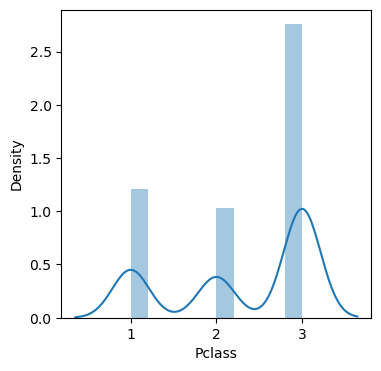

In [17]:
plt.figure(figsize=(4,4))
sns.distplot(df['Pclass'])
plt.show()

by distplot we can obsearve that class 3 passangers are higher in number comparing to class 1 and 2

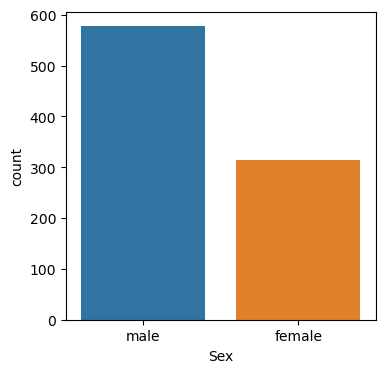

male      577
female    314
Name: Sex, dtype: int64

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Sex'])
plt.show()
df['Sex'].value_counts()

so here in sex column there are 577 male and 314 females are present

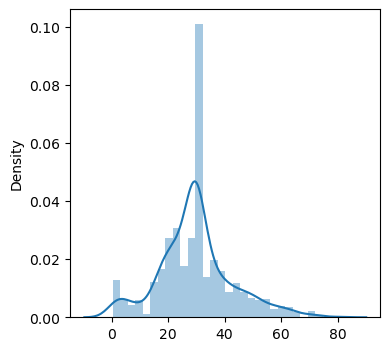

In [19]:
plt.figure(figsize=(4,4))
sns.distplot(x=df['Age'])
plt.show()

In age column  we can see people lies between 20 to 40

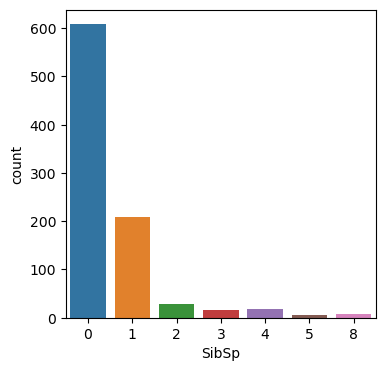

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['SibSp'])
plt.show()
df['SibSp'].value_counts()

In Siblings/spouse columns we can obsearve that no of SibSp with 0 are higher than people having 1,2,3,4,5 SibSp

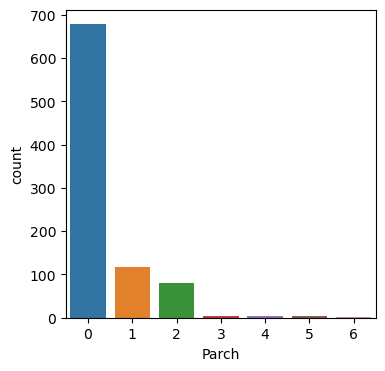

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [21]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Parch'])
plt.show()
df['Parch'].value_counts()

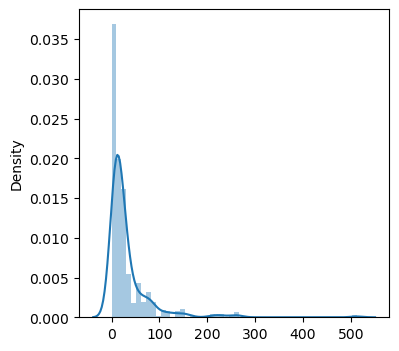

In [22]:
plt.figure(figsize=(4,4))
sns.distplot(x=df['Fare'])
plt.show()


In fare column most people lies between 0 to 80

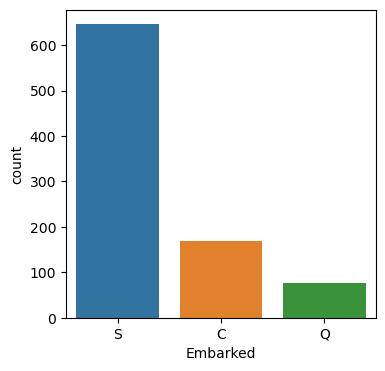

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Embarked'])
plt.show()
df['Embarked'].value_counts()

As we observe countplot for Embarked column most of people embarked from Southampton

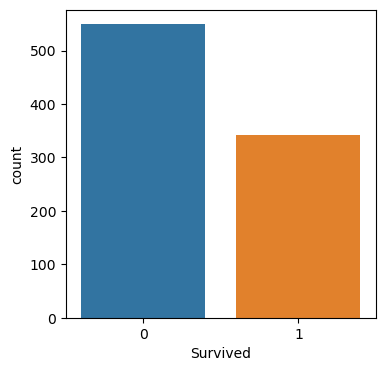

0    549
1    342
Name: Survived, dtype: int64

In [24]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Survived'])
plt.show()
df['Survived'].value_counts()

<Axes: xlabel='Sex', ylabel='count'>

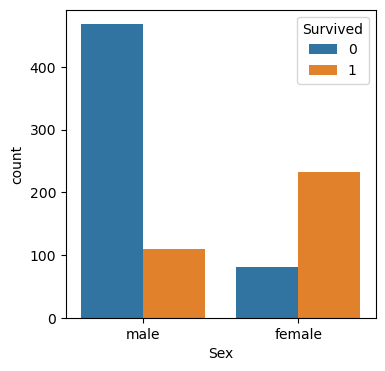

In [25]:
plt.figure(figsize=(4,4))
sns.countplot(x='Sex', hue='Survived',data=df)

in this count plot we can observe that more than male female have survived

<Axes: xlabel='Pclass', ylabel='count'>

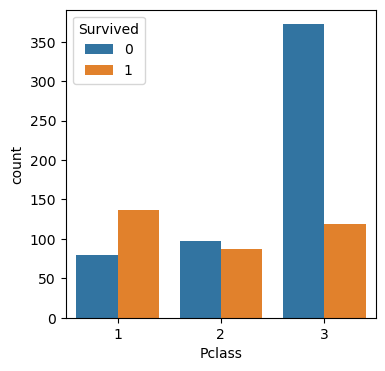

In [26]:
plt.figure(figsize=(4,4))
sns.countplot(x='Pclass', hue='Survived',data=df)

in Pclass column people who are in class 1 and class 3 have more survival rate than class 2

<Axes: xlabel='SibSp', ylabel='count'>

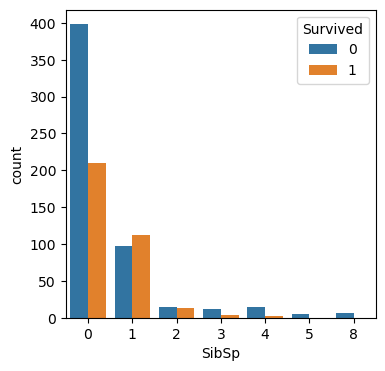

In [27]:
plt.figure(figsize=(4,4))
sns.countplot(x='SibSp', hue='Survived',data=df)

<Axes: xlabel='Parch', ylabel='count'>

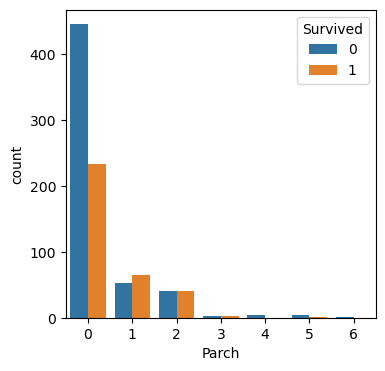

In [28]:
plt.figure(figsize=(4,4))
sns.countplot(x='Parch', hue='Survived',data=df)

In [29]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


splitting target variable 

In [31]:
y = df['Survived']

In [32]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [33]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [34]:
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)

In [35]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


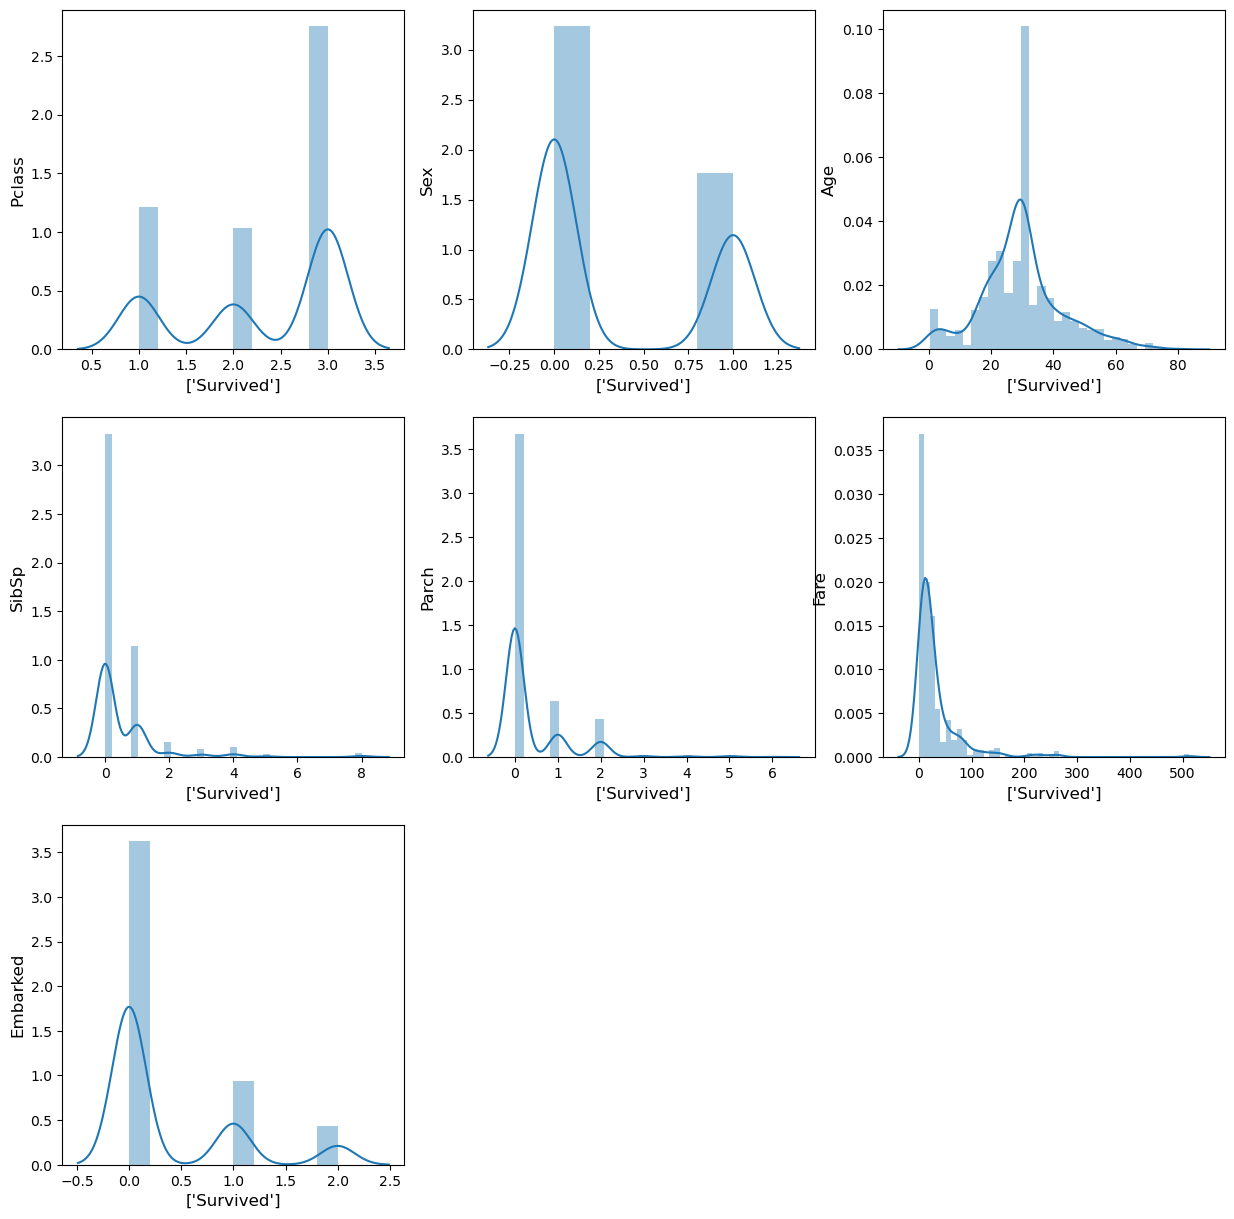

In [36]:
plt.figure(figsize=(15,15))
plot = 1
for i in df:
    if plot<=8:
        plt.subplot(3,3,plot)
        sns.distplot(df[i])
        plt.xlabel(['Survived'], fontsize = 12)
        plt.ylabel(i, fontsize = 12)
    plot+=1
plt.show()

checcking for outliers

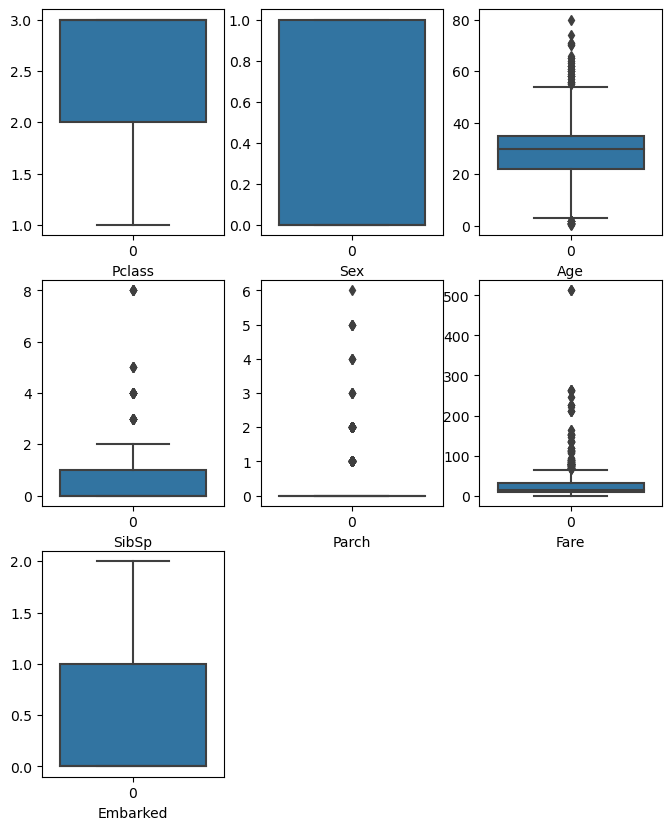

In [37]:
plt.figure(figsize=(8,17))
plot = 1
for col in df:
    if plot<=7:
        plt.subplot(5,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
    plot+=1
plt.show()

As we can observe there are outliers present in Age, SibSp, Parch, Fare columns so we have to remove outliers using zscore method

In [38]:
from scipy.stats import zscore 

In [39]:
df1 = df[['Age','SibSp','Parch','Fare']]
z=np.abs(zscore(df1))
z

,Age,SibSp,Parch,Fare
0,0.592481,0.432793,0.473674,0.502445
1,0.638789,0.432793,0.473674,0.786845
2,0.284663,0.474545,0.473674,0.488854
3,0.407926,0.432793,0.473674,0.420730
4,0.407926,0.474545,0.473674,0.486337
...,...,...,...,...
886,0.207709,0.474545,0.473674,0.386671
887,0.823344,0.474545,0.473674,0.044381
888,0.000000,0.432793,2.008933,0.176263
889,0.284663,0.474545,0.473674,0.044381


Now we have removed outliers 

In [40]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([2, 1, 2, 3, 1, 1, 1, 1, 2, 3, 0, 0, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 3, 3, 1, 3, 2, 3, 3, 1, 2, 2, 3, 1, 0, 3, 1, 1, 3, 2,
        2, 0, 2, 0, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 1, 1, 1, 1,
        1, 1, 0, 2, 1, 2], dtype=int64))

In [41]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(820, 7)

In [42]:
df.shape

(891, 7)

checking wat % of data we have lost after zscore method

In [43]:
print('Loss of Data in percentage',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Loss of Data in percentage 7.968574635241302


checking for skewness

In [44]:
df.skew()

Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

there is skewness present in SibSp, Parch, Fare, Embarked columns

In [45]:
#df['SibSp'] = np.cbrt(df['SibSp'])
#df['Parch'] = np.cbrt(df['Parch'])
#df['Fare'] = np.cbrt(df['Fare'])
#df['Embarked'] = np.cbrt(df['Embarked'])

we have used cbrt but not getting accurate scores

In [46]:
df.skew()

Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [47]:
df['SibSp'] = np.sqrt(df['SibSp'])
df['Parch'] = np.sqrt(df['Parch'])
df['Fare'] = np.sqrt(df['Fare'])
df['Embarked'] = np.sqrt(df['Embarked'])

In [48]:
df.skew()

Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       1.436526
Parch       1.529799
Fare        2.085004
Embarked    1.147293
dtype: float64


and then we have again runned all cells again with sqrt method and with sqrt method we are getting SibSp and Fare column skewness is totally removed but in Parch and Embarked columns theres still skewness present which is acceptable 



Lets check correlation between features

In [49]:
df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,-0.131900,-0.331339,0.006049,-0.006792,-0.660850,-0.014267
Sex,-0.131900,1.000000,-0.084153,0.173428,0.257096,0.237325,0.120208
Age,-0.331339,-0.084153,1.000000,-0.217329,-0.237261,0.108745,0.013643
SibSp,0.006049,0.173428,-0.217329,1.000000,0.473591,0.309346,-0.043933
Parch,-0.006792,0.257096,-0.237261,0.473591,1.000000,0.320344,-0.064453
Fare,-0.660850,0.237325,0.108745,0.309346,0.320344,1.000000,0.098708
Embarked,-0.014267,0.120208,0.013643,-0.043933,-0.064453,0.098708,1.000000


<Axes: >

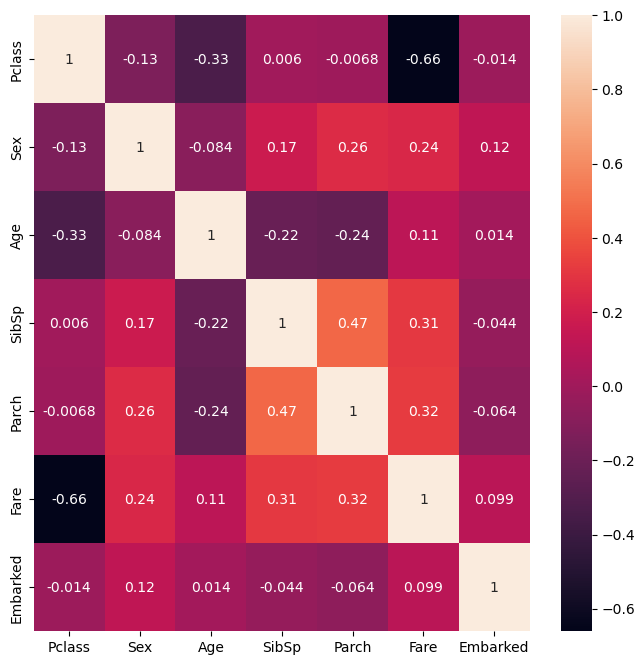

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

Splitting data

In [51]:
x = df
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1.0,0.000000,2.692582,0.000000
1,1,1,38.000000,1.0,0.000000,8.442944,1.000000
2,3,1,26.000000,0.0,0.000000,2.815138,0.000000
3,1,1,35.000000,1.0,0.000000,7.286975,0.000000
4,3,0,35.000000,0.0,0.000000,2.837252,0.000000
...,...,...,...,...,...,...,...
886,2,0,27.000000,0.0,0.000000,3.605551,0.000000
887,1,1,19.000000,0.0,0.000000,5.477226,0.000000
888,3,1,29.699118,1.0,1.414214,4.842520,0.000000
889,1,0,26.000000,0.0,0.000000,5.477226,1.000000


In [52]:
y 

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [53]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Building model

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=0)

In [56]:
log = LogisticRegression()
log.fit(x_train,y_train)
predlog = log.predict(x_test)
print(accuracy_score(y_test,predlog))

0.7985074626865671


In [57]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))

0.7201492537313433


In [58]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = svc.predict(x_test)
print(accuracy_score(y_test,predrfc))

0.7201492537313433


In [59]:
knn =KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))

0.746268656716418


In [60]:
gnb =GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))

0.7723880597014925


In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))

0.7835820895522388


# Cross Validation Score

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
score = cross_val_score(log,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predlog)-score.mean())

[0.78212291 0.79213483 0.78651685 0.7752809  0.81460674]
0.7901324461741259
difference in accuracy 0.008375016512441213


In [64]:
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predsvc)-score.mean())

[0.61452514 0.75280899 0.69101124 0.71348315 0.7247191 ]
0.6993095223149833
difference in accuracy 0.020839731416359975


In [65]:
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predrfc)-score.mean())

[0.78212291 0.80898876 0.85955056 0.76966292 0.82022472]
0.8081099742640134
difference in accuracy -0.08796072053267012


In [66]:
score = cross_val_score(knn,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predknn)-score.mean())

[0.67597765 0.74157303 0.7752809  0.78651685 0.75280899]
0.7464314857824368
difference in accuracy -0.0001628290660188325


In [67]:
score = cross_val_score(gnb,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,predgnb)-score.mean())

[0.74301676 0.78651685 0.78651685 0.76966292 0.78089888]
0.7733224530789029
difference in accuracy -0.0009343933774104141


In [68]:
score = cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print('difference in accuracy',accuracy_score(y_test,preddtc)-score.mean())

[0.69832402 0.79213483 0.78651685 0.74157303 0.80898876]
0.7655075010984872
difference in accuracy 0.01807458845375165


RandomForestClassifier is giving very least difference accuracy

RandomForestClassifier is best model

Saving Model

In [73]:
import joblib

In [74]:
joblib.dump(rfc,'Titanic_prediction.pkl')

['Titanic_prediction.pkl']

In [75]:
model = joblib.load('Titanic_prediction.pkl')
model

RandomForestClassifier()

In [76]:
pred_x = model.predict(x_test)
pred_x

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [78]:
data = pd.DataFrame({'model predicted':pred_x,'original':y_test})
data

,model predicted,original
495,0,0
648,0,0
278,0,0
31,1,1
255,1,1
...,...,...
263,0,0
718,0,0
620,0,0
786,1,1
